In [1]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

In [2]:

class Image (object):
    def __init__(self, path):
        self.path = path
        self.bgr_img = None 
        self.gray_img = None
        self.rgb_img = None
    
    def read_image(self, return_img = False):
        self.bgr_img = cv2.imread(self.path)
        if return_img:
            return self.bgr_img
        
    def rgb(self, return_img = False):
        self.rgb_img = cv2.cvtColor(self.bgr_img, cv2.COLOR_BGR2RGB)
        if return_img:
            return self.rgb_img
        
    def gray(self, return_img = False):
        self.gray_img = cv2.cvtColor(self.bgr_img, cv2.COLOR_BGR2GRAY)
        if return_img:
            return self.gray_img
        
    def show(self, img, title='image'):
        plt.figure(figsize=[20,10])
        if len(img.shape)!=3 :
            plt.imshow(img,cmap='gray')
        else:
            plt.imshow(img)

        plt.title(title)
        plt.show(img)
        
        
    def show_all(self,image_list,title_list):
        plt.figure(figsize=[20,10])
        assert len(image_list) == len(title_list),"Houston we've got a problem"
        N=len(image_list)
        for index,(img, title) in enumerate(zip(image_list, title_list)):
          plt.subplot(1, N, index+1)
          if len(img.shape) !=3:
            plt.imshow(img ,cmap='gray')
          else:
            plt.imshow(img)
          plt.title(title)
        plt.show()
        

# Test 1

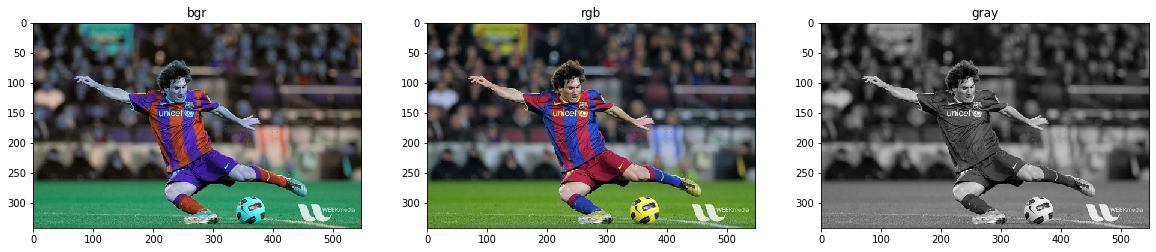

In [3]:
img = Image('messi.jpg')
bgr = img.read_image(return_img=True)
rgb = img.rgb(return_img=True)
gray = img.gray(return_img=True)
img.show_all([bgr,rgb,gray],['bgr','rgb','gray'])

In [4]:
def normalizing(img):
    return img/np.max(np.abs(img))

In [5]:
def convolve2d(image, kernel):
    kernel = np.flip(np.flip(kernel, axis = 1), axis = 0)
    convolved_matrix = np.zeros_like(image)
    mask_size = kernel.shape[0]
    image = normalizing(image)
    padding_size = int((mask_size - 1)/2)
    image_cpy = np.zeros([2*padding_size + image.shape[0], 2*padding_size + image.shape[1]]) #a copy of the image to work on (used for padding)
    image_cpy[padding_size:-padding_size, padding_size: -padding_size] = image
    
    for x in range(image.shape[1]):
            for y in range(image.shape[0]):
                convolved_matrix[y, x] = (kernel * image_cpy[y:y + mask_size, x:x + mask_size]).sum()
    return convolved_matrix
    
    
    

# test 2

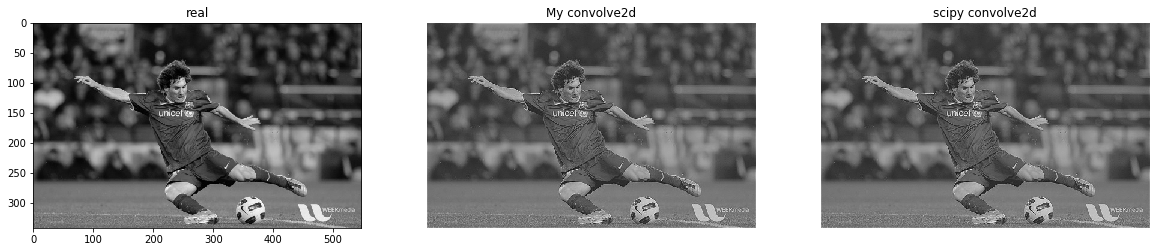

In [6]:
kernel = np.array([[0, -1, 0], [-1, 8, -1], [0, -1, 0]]) / 4
image_equalized = gray / np.max(np.abs(gray))
image_kernel = convolve2d(image_equalized, kernel)
plt.figure(figsize=[20, 10])
plt.subplot(131)
plt.imshow(image_equalized, cmap=plt.cm.gray)
plt.title('real')
plt.subplot(132)
plt.imshow(image_kernel, cmap=plt.cm.gray)
plt.title('My convolve2d')
plt.axis('off')
import scipy.signal

image_kernel = scipy.signal.convolve2d(image_equalized, kernel, 'same')
plt.subplot(133)
plt.imshow(image_kernel, cmap=plt.cm.gray)
plt.title('scipy convolve2d')
plt.axis('off')
plt.show()